<a href="https://colab.research.google.com/github/aasimasheikh-02/Deep-Learning/blob/main/cats_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
tf.keras.utils.get_file('cats_and_dogs_filtered.zip',"https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip")


68616192/68606236 [==============================] - 1s 0us/step


'/root/.keras/datasets/cats_and_dogs_filtered.zip'

In [ ]:
import os
import zipfile

In [ ]:
local_zip = '/root/.keras/datasets/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall()
zip_ref.close()

In [ ]:
os.listdir('cats_and_dogs_filtered')

['validation', 'train', 'vectorize.py']

In [ ]:
len(os.listdir('cats_and_dogs_filtered'))

3

In [ ]:
len(os.listdir('cats_and_dogs_filtered/train/dogs'))

1000

In [ ]:
from keras.preprocessing.image import img_to_array, array_to_img,load_img

In [ ]:
image1= load_img('cats_and_dogs_filtered/train/cats/cat.105.jpg')

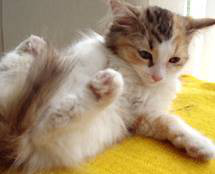

In [ ]:
image1

In [ ]:
image_1_array = img_to_array(image1)

In [ ]:
image_1_array

array([[[105.,  97.,  86.],
        [101.,  93.,  82.],
        [115., 107.,  96.],
        ...,
        [243., 244., 239.],
        [243., 244., 239.],
        [242., 243., 238.]],

       [[105.,  97.,  86.],
        [101.,  93.,  82.],
        [115., 107.,  96.],
        ...,
        [243., 244., 239.],
        [243., 244., 239.],
        [243., 244., 239.]],

       [[105.,  97.,  86.],
        [101.,  93.,  82.],
        [115., 107.,  96.],
        ...,
        [244., 245., 240.],
        [243., 244., 239.],
        [243., 244., 239.]],

       ...,

       [[ 75.,  39.,  15.],
        [ 69.,  33.,   7.],
        [ 63.,  27.,   1.],
        ...,
        [221., 186.,  44.],
        [224., 189.,  47.],
        [223., 188.,  46.]],

       [[ 72.,  35.,   9.],
        [ 74.,  37.,  10.],
        [ 77.,  40.,  13.],
        ...,
        [219., 183.,  43.],
        [220., 184.,  44.],
        [220., 184.,  44.]],

       [[ 68.,  31.,   4.],
        [ 77.,  40.,  13.],
        [ 86.,  

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Flatten,Dropout,MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
path = os.path.join('cats_and_dogs_filtered')

In [ ]:
train_dir = os.path.join(path,'train')

In [ ]:
validation_dir = os.path.join(path,'validation')

In [ ]:
train_cats_dir = os.path.join(train_dir,'cats')
train_dogs_dir = os.path.join(train_dir,'dogs')

In [ ]:
validation_cats_dir = os.path.join(validation_dir,'cats')
validation_dogs_dir = os.path.join(validation_dir,'dogs')

In [ ]:
len(os.listdir(train_cats_dir))

1000

In [ ]:
num_cats_tr = len(os.listdir(train_cats_dir))
num_dogs_tr = len(os.listdir(train_dogs_dir))
num_cats_val = len(os.listdir(validation_cats_dir))
num_dogs_val = len(os.listdir(validation_dogs_dir))
print('Cat training data ',num_cats_tr)
print('Dog training Data ',num_dogs_tr)
print('Cat Valid data ',num_cats_val)
print('Dog valid data ',num_dogs_val)

Cat training data  1000
Dog training Data  1000
Cat Valid data  500
Dog valid data  500


In [ ]:
total_train=num_cats_tr+num_dogs_tr
total_val=num_cats_val+num_dogs_val
print('Total Training images',total_train)
print('Total validation images',total_val)

Total Training images 2000
Total validation images 1000


In [ ]:
batch_size = 200
epochs = 25
IMG_HIEGHT = 150
IMG_WIDHT = 150

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                           class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=validation_dir,
                                                              target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                              class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
sample_train_image,labels = next(train_data_gen)

In [ ]:
sample_train_image.shape

(200, 150, 150, 3)

In [ ]:
labels

array([1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 1.,
       0., 0., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 0., 1., 1., 0.], dtype=float32)

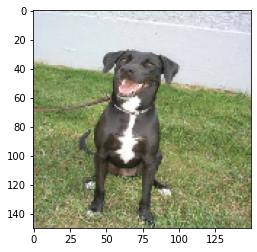

In [ ]:
plt.imshow(sample_train_image[0])


In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1,6,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(images_arr,axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

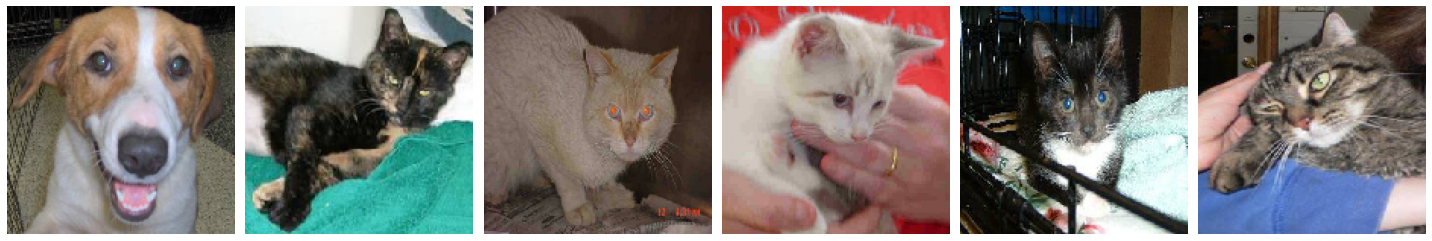

In [ ]:
plotImages(sample_train_image[2:8])


In [ ]:
model= Sequential([
    Conv2D(16,3,padding='same', activation='relu', input_shape=(IMG_HIEGHT,IMG_WIDHT,3)),
    MaxPooling2D(),
    Conv2D(32,3,padding='same',activation='relu'),#75,75
    MaxPooling2D(),#37,37
    Conv2D(64,3,padding='same',activation='relu'),#37,37
    MaxPooling2D(),#18,18
    Flatten(),
    Dense(512,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 37, 37, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 18, 18, 64)       0

In [ ]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])

In [ ]:
history = model.fit(train_data_gen,steps_per_epoch=total_train//batch_size,epochs=epochs,
                             validation_data=val_data_gen,validation_steps=total_val//batch_size)

Epoch 1/25
10/10 [==============================] - 23s 826ms/step - loss: 1.1058 - accuracy: 0.4925 - val_loss: 0.6914 - val_accuracy: 0.5000
Epoch 2/25
10/10 [==============================] - 8s 813ms/step - loss: 0.6928 - accuracy: 0.5005 - val_loss: 0.6900 - val_accuracy: 0.5530
Epoch 3/25
10/10 [==============================] - 8s 807ms/step - loss: 0.6851 - accuracy: 0.5470 - val_loss: 0.6737 - val_accuracy: 0.6310
Epoch 4/25
10/10 [==============================] - 8s 814ms/step - loss: 0.6611 - accuracy: 0.6120 - val_loss: 0.6505 - val_accuracy: 0.6450
Epoch 5/25
10/10 [==============================] - 8s 801ms/step - loss: 0.6197 - accuracy: 0.6635 - val_loss: 0.6322 - val_accuracy: 0.6330
Epoch 6/25
10/10 [==============================] - 8s 819ms/step - loss: 0.5837 - accuracy: 0.6950 - val_loss: 0.6220 - val_accuracy: 0.6490
Epoch 7/25
10/10 [==============================] - 8s 856ms/step - loss: 0.5476 - accuracy: 0.7205 - val_loss: 0.5996 - val_accuracy: 0.6840
Epoch

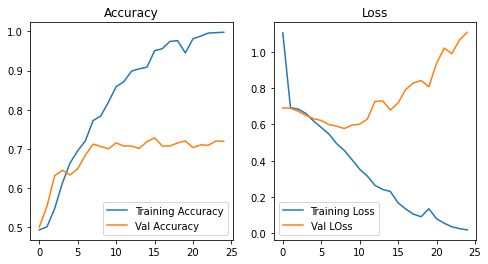

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [ ]:
# Augmentation & Dropout layer

In [ ]:
image_gen_train = ImageDataGenerator(rescale=1./255,
                                    rotation_range=45,
                                    width_shift_range=.15,
                                    height_shift_range=.15,
                                    horizontal_flip=True,
                                    zoom_range=0.5)

In [ ]:
train_data_gen = image_gen_train.flow_from_directory(batch_size=batch_size,
                                                    directory=train_dir,
                                                    shuffle=True,
                                                    target_size=(IMG_HIEGHT,IMG_HIEGHT),
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
train_data_gen.class_indices

{'cats': 0, 'dogs': 1}

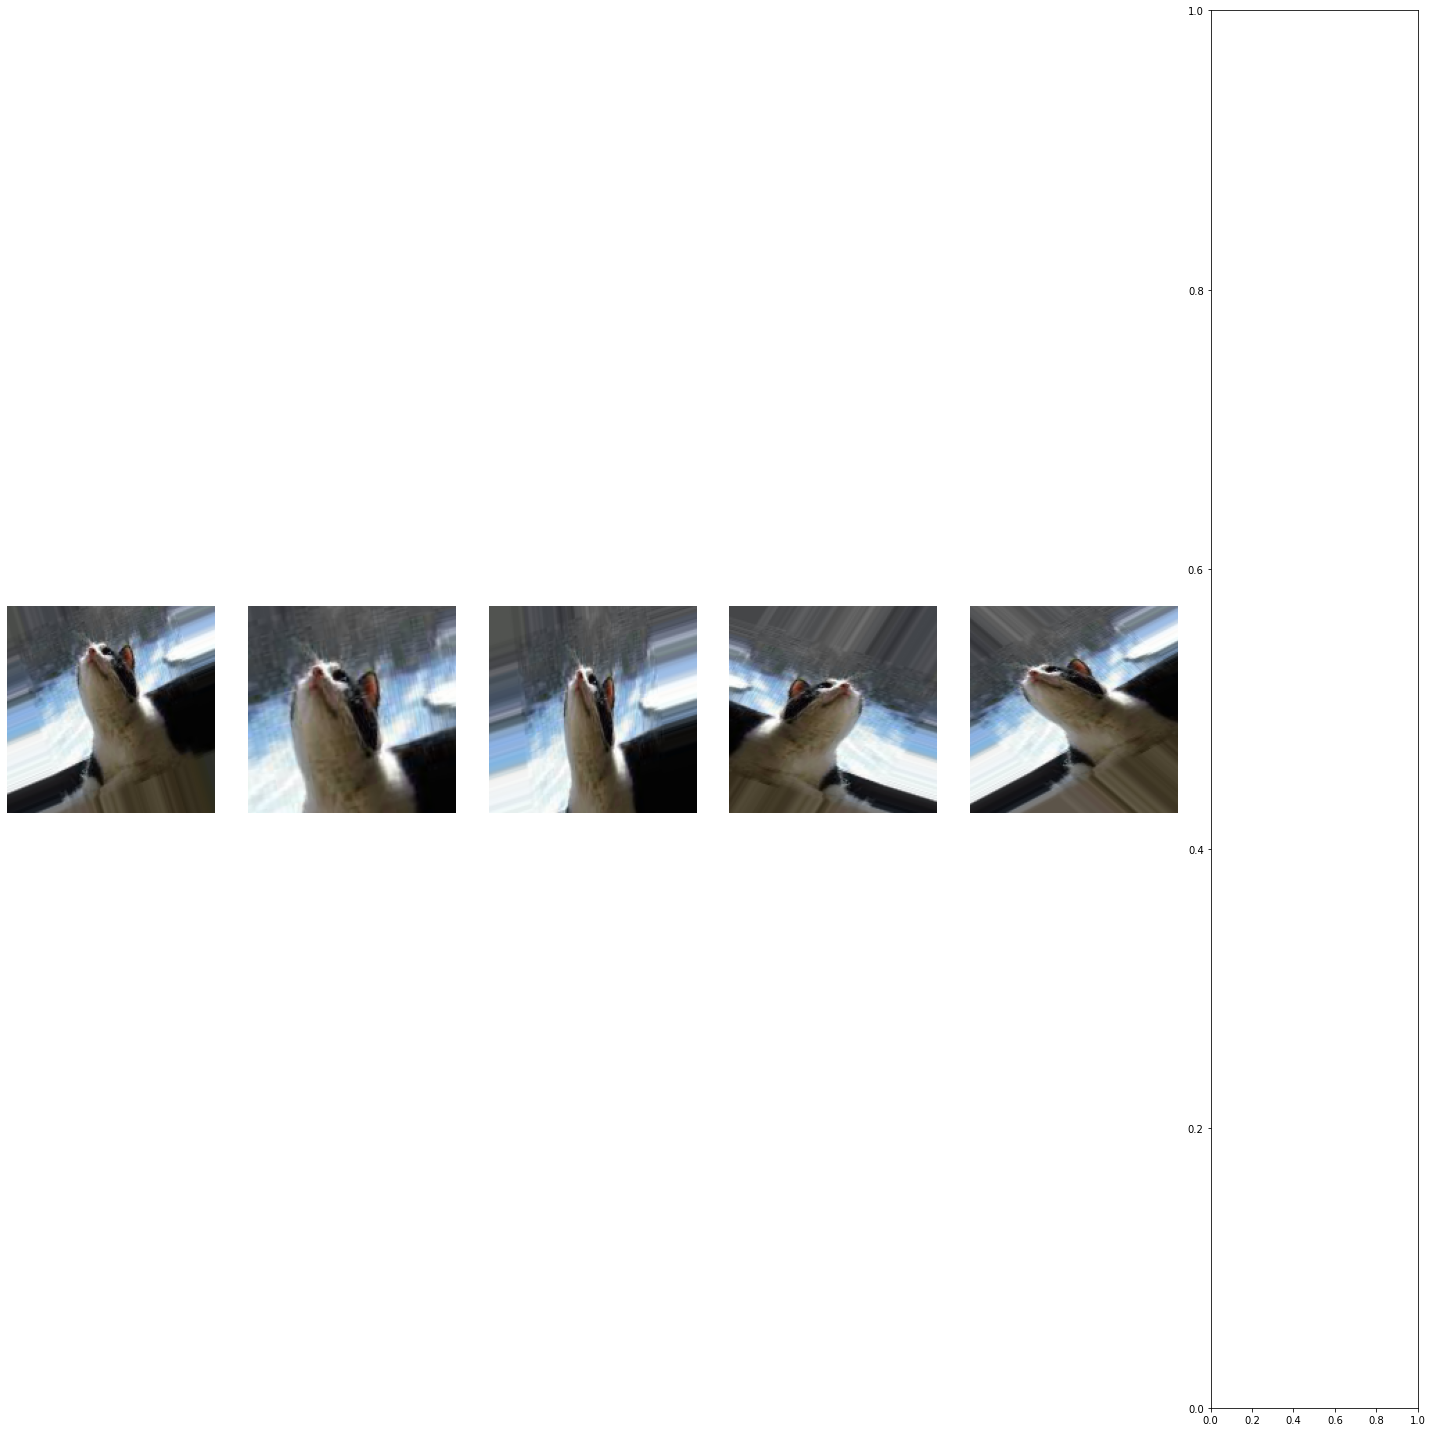

In [ ]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size,
                                                directory=validation_dir,
                                                target_size=(IMG_HIEGHT,IMG_WIDHT),
                                                class_mode='binary')

Found 1000 images belonging to 2 classes.


In [ ]:
model_new = Sequential([
    Conv2D(16,3,padding='same',activation='relu',input_shape=(IMG_HIEGHT,IMG_WIDHT,3)), #150,150
    MaxPooling2D(),#75,75
    Dropout(0.2),
    Conv2D(32,3,padding='same',activation='relu'),#75,75
    MaxPooling2D(),#37,37
    Dropout(0.2),
    Conv2D(64,3,padding='same',activation='relu'),#37,37
    MaxPooling2D(),#18,18
    Dropout(0.2),
    Flatten(),
    Dense(512,activation='relu'),
    Dropout(0.2),
    Dense(1,activation='sigmoid')
])

In [ ]:
model_new.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),metrics=['accuracy'])


In [ ]:
history = model_new.fit(train_data_gen,steps_per_epoch=total_train//batch_size,epochs=100,
                             validation_data=val_data_gen,validation_steps=total_val//batch_size)

Epoch 1/100
10/10 [==============================] - 17s 2s/step - loss: 2.3745 - accuracy: 0.4935 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/100
10/10 [==============================] - 16s 2s/step - loss: 0.6996 - accuracy: 0.5005 - val_loss: 0.6930 - val_accuracy: 0.5120
Epoch 3/100
10/10 [==============================] - 16s 2s/step - loss: 0.6928 - accuracy: 0.5340 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/100
10/10 [==============================] - 16s 2s/step - loss: 0.6931 - accuracy: 0.4985 - val_loss: 0.6931 - val_accuracy: 0.4970
Epoch 5/100
10/10 [==============================] - 16s 2s/step - loss: 0.6931 - accuracy: 0.5125 - val_loss: 0.6931 - val_accuracy: 0.5020
Epoch 6/100
10/10 [==============================] - 16s 2s/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6928 - val_accuracy: 0.5130
Epoch 7/100
10/10 [==============================] - 16s 2s/step - loss: 0.6927 - accuracy: 0.5080 - val_loss: 0.6923 - val_accuracy: 0.5050
Epoch 8/100
1

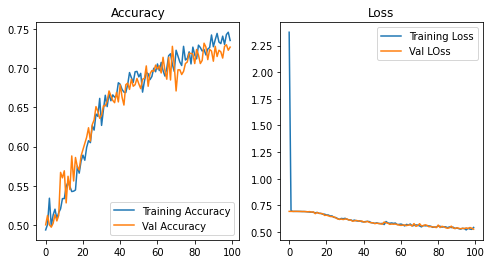

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(100)
plt.figure(figsize=(8,4))
plt.subplot(1,2,1)
plt.plot(epochs_range,acc,label='Training Accuracy')
plt.plot(epochs_range,val_acc,label='Val Accuracy')
plt.legend(loc='lower right')
plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(epochs_range,loss,label='Training Loss')
plt.plot(epochs_range,val_loss,label='Val LOss')
plt.legend(loc=0)
plt.title('Loss')
plt.show()

In [ ]:
test = load_img('cat.jpg',target_size=(150,150))

FileNotFoundError: ignored

In [ ]:
test

In [ ]:
test_array = img_to_array(test)

In [ ]:
test_array.shape

In [ ]:
test_array = test_array.reshape(1,150,150,3)

In [ ]:
model_new.predict(test_array)

In [ ]:
tf.keras.models.save_model(model_new,'model_DC.h5')